# Stock Bot
the stuff

In [1]:
from tensorflow import keras
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import gym_anytrading
from StockTradeEnv import FastTrainingStockTradeEnv
from LowRegulationStockTradeEnv import LowRegulationStockTradeEnv
import quantstats as qs
from stable_baselines3.common.callbacks import CheckpointCallback, EveryNTimesteps
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import PPO, A2C
from stable_baselines3.ppo.policies import MlpPolicy as MlpPolicyPPO
from stable_baselines3.a2c.policies import MlpPolicy as MlpPolicyA2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv,SubprocVecEnv,VecEnv
from Utilities import *
import torch
from torch import nn

## Training and setup

In [2]:
# Parallel environments
stks = ['kros','nflx']#,'tmus','adct','h','bngo','amzn','nio','fb','gme','work','irbt','upwk','fvrr','rdfn','bynd','etsy','pins','zg','roku','sq','pm','dis','nlok','bio','gbio']
# env = DummyVecEnv([lambda: LowRegulationStockTradeEnv(ticker=stks[i],frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2) for i in range(len(stks))])
df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env = LowRegulationStockTradeEnv(df=df,frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2)


/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [11]:
model_ppo = PPO(MlpPolicyPPO, env, verbose=0)
model_a2c = A2C(MlpPolicyA2C, env, verbose=0)

In [12]:
model_ppo=model_ppo.learn(100000)
model_a2c=model_a2c.learn(100000)

50 ----------------------
       step reward: 0.0
Step: 451 ----------------------
       step reward: 0.0
Step: 452 ----------------------
       step reward: 0.0
Step: 453 ----------------------
       step reward: 0.0
Step: 454 ----------------------
       step reward: 0.0
Step: 455 ----------------------
       step reward: 0.0
Step: 456 ----------------------
       step reward: 0.0
Step: 457 ----------------------
       step reward: 0.0
Step: 458 ----------------------
       step reward: 0.0
Step: 459 ----------------------
       step reward: 0.0
Step: 460 ----------------------
       step reward: 0.0
Step: 461 ----------------------
       step reward: 0.0
Step: 462 ----------------------
       step reward: 0.0
Step: 463 ----------------------
       step reward: 0.0
Step: 464 ----------------------
       step reward: 0.0
Step: 465 ----------------------
       step reward: 0.0
Step: 466 ----------------------
       step reward: 0.0
Step: 467 ----------------------
     

## Testing
Lets see how the model did

iters: 985


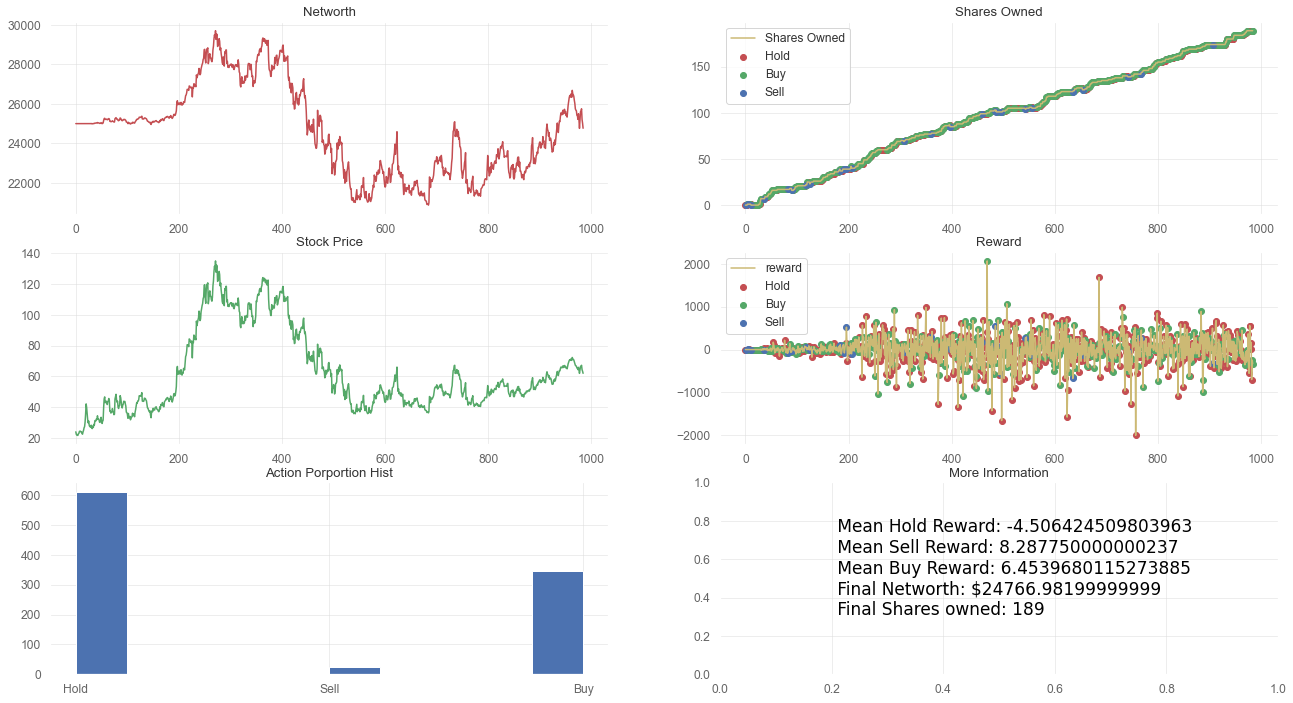

In [26]:
#test on val set on PPO 
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/agio.us.txt")
env_p = eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_ppo,verbose=0)
fig_p = plot_history(env_p.history,(22, 12)) 

iters: 3100


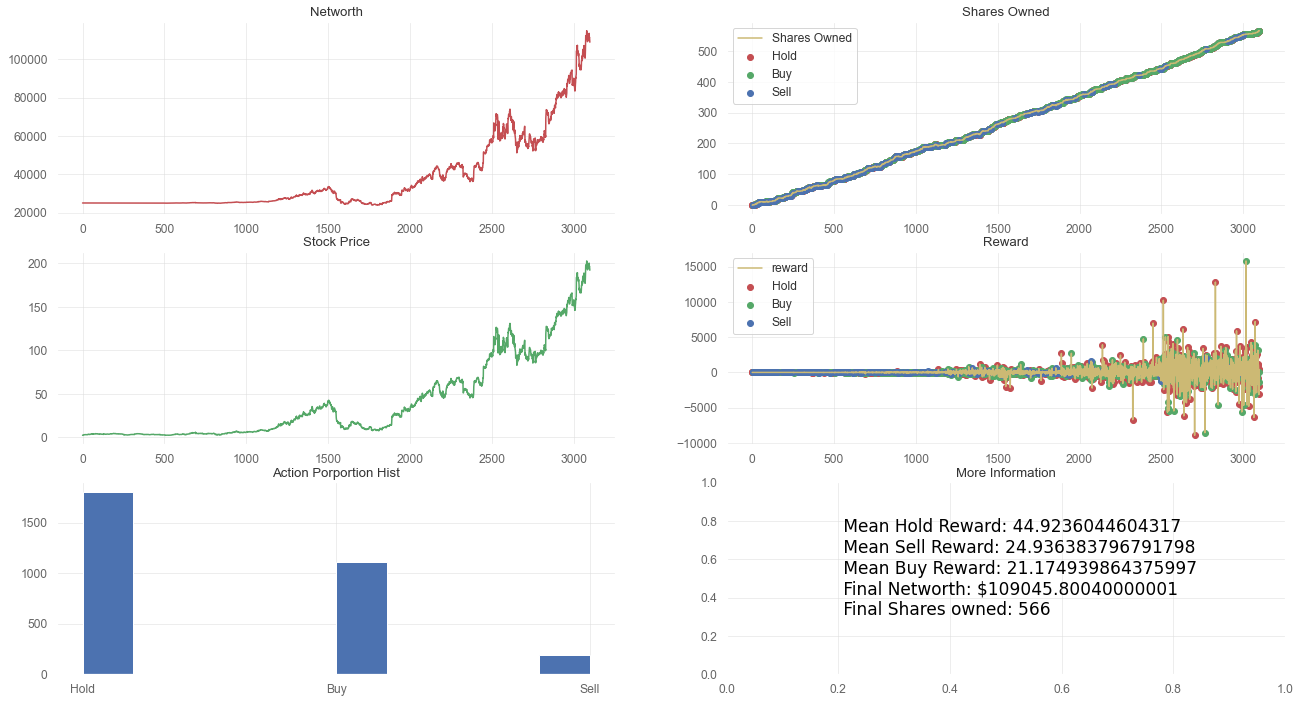

In [27]:
#test on train set PPO
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env_p= eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_ppo,verbose=0)
fig_p = plot_history(env_p.history,(22, 12)) 

iters: 985


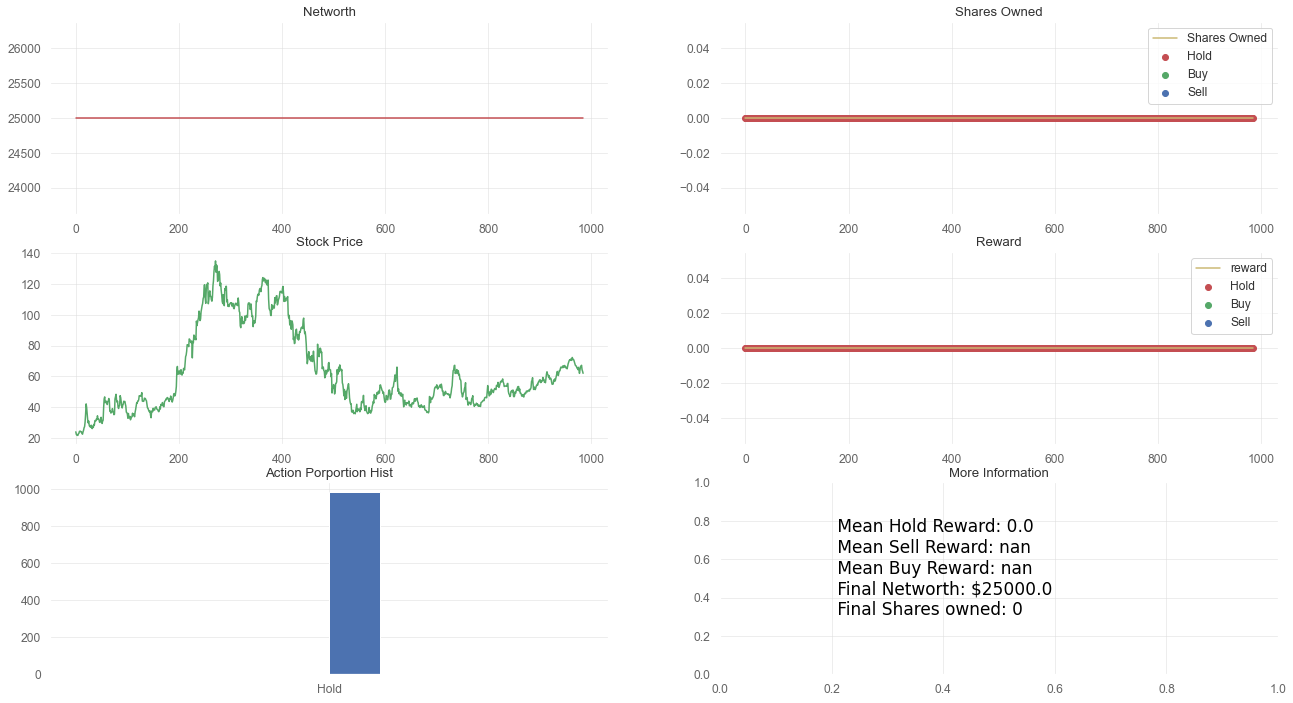

In [28]:
#test on val set A2C
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/agio.us.txt")
env_p = eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_a2c,verbose=0)
fig_p = plot_history(env_p.history,(22, 12)) 

iters: 3100


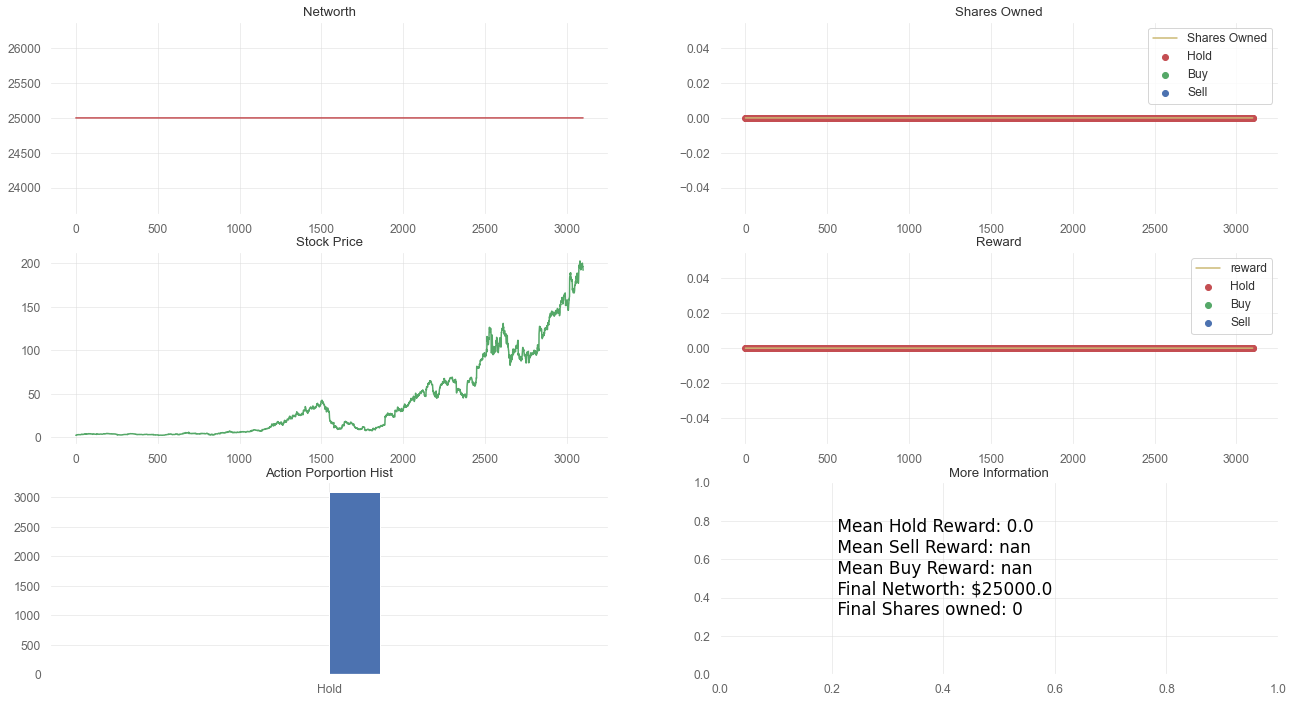

In [29]:
#test on train set A2C
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env_a = eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_a2c,verbose=0)
fig_a = plot_history(env_a.history,(22, 12)) 